In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
X = 2 * np.random.rand(100,1)

In [67]:
y = 4 + 3 * X * np.random.rand(100, 1)

In [68]:
X = np.c_[np.ones((100,1)), X]

In [69]:
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [70]:
theta_best

array([[ 3.92281046],
       [ 1.58751438]])

In [71]:
X_new = np.array([[0], [2]])

In [72]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [73]:
y_predicted = X_new_b.dot(theta_best)

In [74]:
y_predicted

array([[ 3.92281046],
       [ 7.09783921]])

[0, 2, 0, 15]

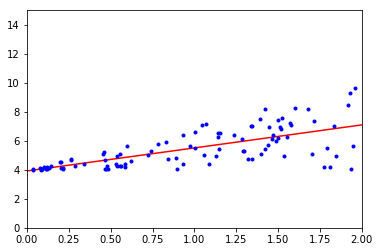

In [75]:
plt.plot(X_new, y_predicted, "r-")
plt.plot(X[:,1],y, "b.")
plt.axis([0,2,0,15])

In [76]:
X_new

array([[0],
       [2]])

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
linear_model = LinearRegression()

In [79]:
X_train = np.array(X[:,1])

In [80]:
linear_model.fit(X_train.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
linear_model.intercept_, linear_model.coef_

(array([ 3.92281046]), array([[ 1.58751438]]))

In [82]:
linear_model.predict([[0], [2]])

array([[ 3.92281046],
       [ 7.09783921]])

In [83]:
eta = 0.1 # learning rate
n_iterations = 1000
m = len(X)

In [84]:
theta = np.random.randn(2,1) # random init

In [85]:
for iteration in range(n_iterations):
    gradient = X.T.dot(X.dot(theta) - y) / m
    theta = theta - eta * gradient
print(theta)

[[ 3.92281036]
 [ 1.58751446]]


### Stochastic Gradient Descent

In [86]:
n_epochs = 50
t0, t1 = 5, 50

In [87]:
def learning_schedule(t):
    return t0 / (t + t1)

In [88]:
theta = np.random.randn(2,1)

In [89]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [90]:
theta

array([[ 3.9302817 ],
       [ 1.57332626]])

In [91]:
from sklearn.linear_model import SGDRegressor

In [92]:
sgd_regressor = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)

In [93]:
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [94]:
sgd_regressor.intercept_

array([ 1.98309474])

In [95]:
sgd_regressor.coef_

array([ 1.98309474,  1.6182035 ])

## Polynomial regression

In [96]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

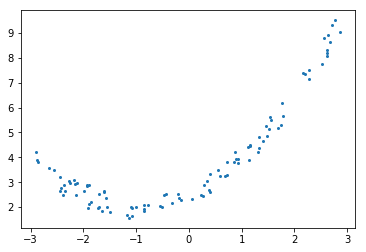

In [97]:
plt.scatter(X, y, 4)

In [98]:
X[0]

array([ 2.28289135])

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly_features = PolynomialFeatures(include_bias=False)

In [101]:
X_poly = poly_features.fit_transform(X)

In [102]:
X[0]

array([ 2.28289135])

In [103]:
X_poly[0]

array([ 2.28289135,  5.2115929 ])

In [104]:
linear_model = LinearRegression()

In [105]:
linear_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
linear_model.intercept_

array([ 2.47216574])

In [107]:
linear_model.coef_

array([[ 0.98813286,  0.5084311 ]])

In [108]:
predictions = linear_model.predict(X_poly)

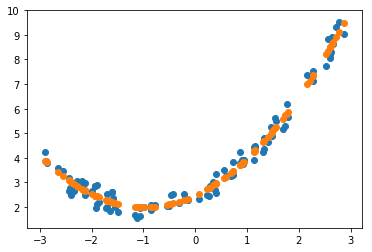

In [109]:
plt.figure()
plt.scatter(X, y)
plt.scatter(X, predictions)

In [110]:
X.shape

(100, 1)

In [111]:
predictions.shape

(100, 1)

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [113]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")

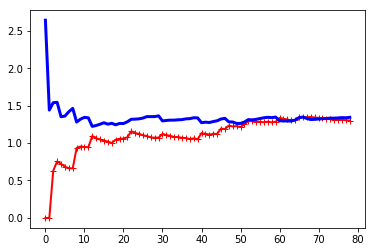

In [114]:
plot_learning_curve(LinearRegression(), X, y)

In [115]:
from sklearn.pipeline import Pipeline

In [116]:
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
))

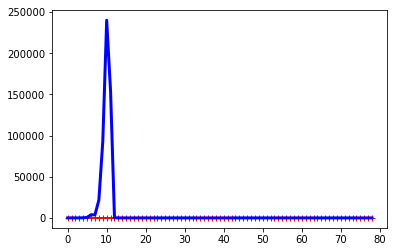

In [121]:
plot_learning_curve(polynomial_regression, X,y)

In [123]:
from sklearn.linear_model import Ridge

In [124]:
ridge_reg = Ridge(solver="cholesky")

In [125]:
ridge_reg.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [126]:
ridge_reg.predict([[1.5]])

array([[ 5.38773872]])

In [127]:
sgd_reg = SGDRegressor(penalty="l2")

In [129]:
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [130]:
sgd_reg.predict([[1.5]])

array([ 4.27135471])

In [131]:
from sklearn.linear_model import Lasso

In [132]:
lasso = Lasso(alpha=0.1)

In [133]:
lasso.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
lasso.predict([[1.5]])

array([ 5.33798046])

In [135]:
from sklearn.datasets import load_iris

In [136]:
iris = load_iris()

In [139]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [140]:
X = iris["data"][:, 3:]

In [141]:
X.shape

(150, 1)

In [143]:
y = (iris["target"] == 2).astype(np.int)

In [144]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
log_model = LogisticRegression()

In [147]:
log_model.fit(X, y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

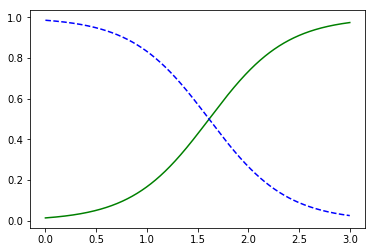

In [164]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_model.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not iris virginica")


In [166]:
X = iris["data"][:, (2,3)]
y=iris["target"]
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
softmax.predict([[5,2]])

array([2])

In [168]:
softmax.predict_proba([[5,2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])